# Sign Language with Deep Learning

## About the data
The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

### Dataset information
- The dataset format is patterned to match closely with the classic MNIST. 
- Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (**and no cases for 9=J or 25=Z because of gesture motions**). 
- The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

Let's see what does each sign actually mean.
![](https://i.imgur.com/6CnwYlF.png)


## Loading the dataset

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
train = pd.read_csv('./sign-language-mnist/sign_mnist_train.csv')
test = pd.read_csv('./sign-language-mnist/sign_mnist_test.csv')

In [34]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [35]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


## Observation
You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusively.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

Sine the labels in out dataset are all numbers. Let's create a list of label names for visualization purpose later on.

In [36]:
class_names = ['A','B','C','D','E','F','G',
               'H','I','K','L','M','N',
               'O','P','Q','R','S','T','U',
               'V','W','X','Y']

# Data exploration

Let's draw a `countplot` using `seaborn` to see the distribution of classes in our data.

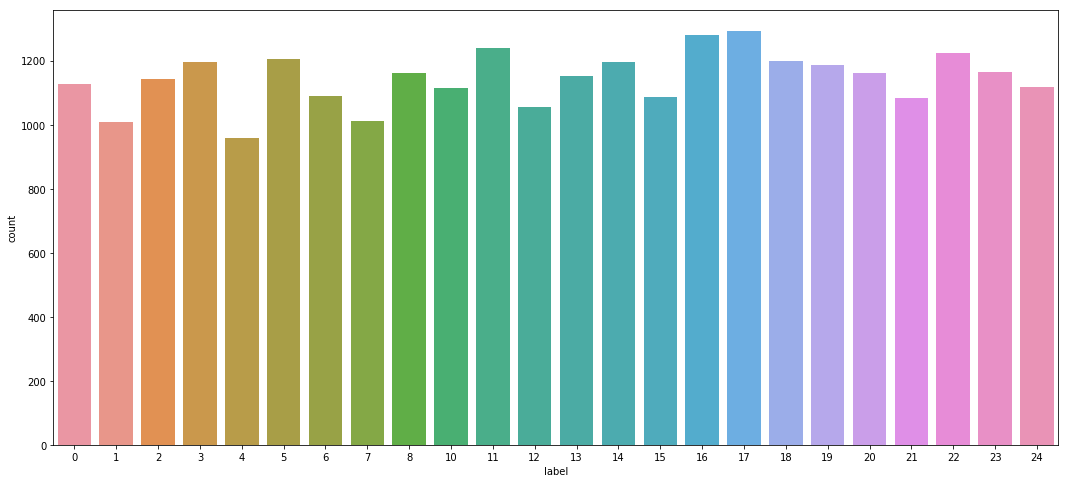

In [37]:
plt.figure(figsize = (18,8))
sns.countplot(x=train['label'])

As a result, you should see that the classes in the training data almost equally distributed.

In [38]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


## Inspecting Labels of Training and Testing Data

Print out the unique values of `labels` in ascending order to see if there is something wrong.

Do this by using `unique()` method on the `label` series.

In [39]:
np.sort(train['label'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [40]:
np.sort(test['label'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

## Preprocessing Labels

**Recall**: 

- Our original dataset omit the case of **9=J** and **25=Z**, which makes our data contain only 24 characters.

- It seems like we have a small inconsistence with the labels here. Since there are 24 distinct labels, the range of values of labels should be `[0,23]`. 

- However, we miss the label `9`, making the range of values of labels to be `[0,24]`. **This will yield an error in the training phase**.

**Solution**:
1. We can tackle this issue by converting the labels to dummy variables via one-hot method. By this way, we do not care about the range of values of labels.
    - This can be obtained by using `sklearn.preprocessing.LabelBinarizer`.
2. An alternative (and more obvious) solution is updating the values of labels after `8` to lower one unit.

In this case, we make use of the 2nd solution.

**Notice**: We should do this for both training and testing set.

Let's implement a `preprocessing_label()` function, which performs:
- For any label whose value is larger than 8, reduce it by 1 unit.

In [41]:
def preprocessing_label(label):
    if label > 8:
        label = label - 1
    return label

Let's apply it to the `label` column to update our training and testing data.

In [42]:
train['label'] = train['label'].map(preprocessing_label)
test['label'] = test['label'].map(preprocessing_label)

Let's check again your `label` column in both training and testing data.

In [43]:
np.sort(train['label'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [44]:
np.sort(test['label'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

## Obtaining Labels

Looks neat! Now let's save the labels in both training and testing data to `train_labels` and `test_labels` variables.

**Notice**: Convert the Series to Numpy Array by using `.values`

In [45]:
train_labels = train['label'].values
test_labels = test['label'].values

Next, let's get rid of `labels` column in both training and testing data.
- Hint: Using `dataframe.drop()` method.

In [46]:
train.drop('label', axis = 1, inplace = True)

In [47]:
test.drop('label', axis=1, inplace = True)

## Preprocessing Images

We need to preprocess image data before training the network. Let's inspect the first image in training data. The range of pixel is from 0 to 255.

In [48]:
# Reshape images back to 28x28 matrix to visualize
train_images = train.values
train_images = np.array([np.reshape(i, (28, 28)) for i in train_images])

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])

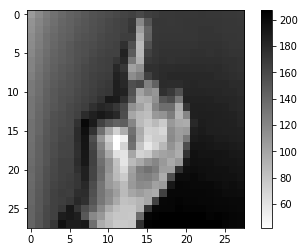

In [49]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

As a principle, we need to normalize the images to the range of `[0,1]` before feeding to the network. **Why do we do this?**
- The explaination [here](https://stackoverflow.com/questions/4674623/why-do-we-have-to-normalize-the-input-for-an-artificial-neural-network) is that we can make training phase faster and optimize the loss function at best.

**Notice**: We should conduct this for both training and testing set.

In [50]:
train_images = train_images / 255
test_images = test_images / 255

Let's visualize the image after the normalization. Notice the range of value is reduced but we still keep the information of the image.

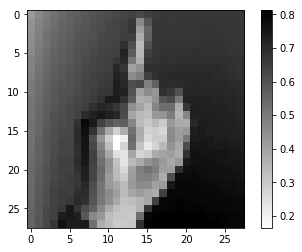

In [51]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

Display the first 25 images from the *training dataset* with their corresponding label as below.

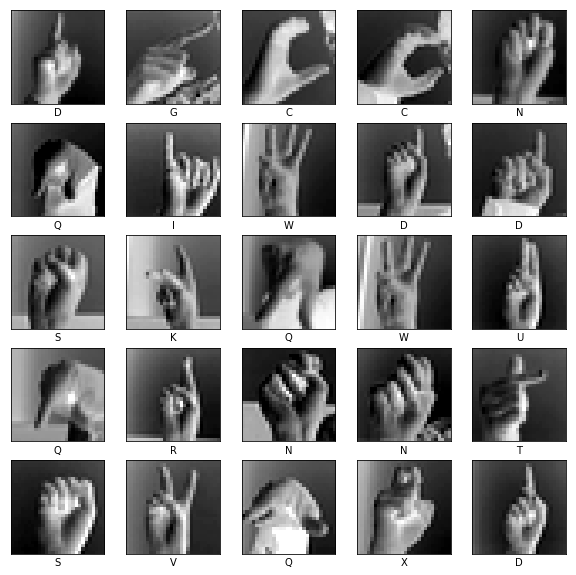

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Training/Validating Data Splitting

**Notice**: 
- We already have an explicit testing data. Therefore, we split the training data into 2 different data: `training` and `validating`.
- To sum up, have 3 total dataset in this problem.
    - `Training data`: Used for training the network.
    - `Validating data`: Used for evaluating the network during training phase.
    - `Testing data`: Used for evaluating the true performance of the network.

Spliting the dataset into train (70%) and validation (30%) dataset.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.3, random_state = 101)

### Reshaping Image in prior to Fitting the Neural Network

In [55]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

As you can see, your image data now has: 19218 instances, 28x28 pixel, 1 channel color

In [56]:
X_train.shape

(19218, 28, 28, 1)

## Building a CNN Model
Building a neural network requires configuring the layers of the network and compiling it.

But first, let's import **Tensorflow-Keras** library for deep learning models.

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

### Configuring Neural Network Hyperparameters
Let's create the batch size=128 and using epochs=10.

What we consider here is the number of **epochs** and **batch size**. For short:
- 1 Epoch = 1 Forward pass + 1 Backward pass for **ALL training samples**.
- Batch Size = Number of training samples in 1 Forward/1 Backward pass. (With increase in Batch size, required memory space increases.)
- Number of iterations = Number of passes i.e. 1 Pass = 1 Forward pass + 1 Backward pass (Forward pass and Backward pass are not counted differently.)

*Example* : If we have 1000 training samples and Batch size is set to 500, it will take 2 iterations to complete 1 Epoch.

**Why do we need to use Batch size?**:
- When the data fed into the network is too large, we cannot feed the whole data at once. Therefore, we need to divide our original training data into smaller batches.

In [58]:
batch_size = 128
num_classes = 24
epochs = 10

### Setting the Layers

Layers are the basic building blocks of a neural network. Layers can extract the features from the data we fed to them. These features are expected to be more meaningful than the hand-engineer features.

Most deep learning models consist of chaining together simple layers. In this problem, our CNN model should be set as a typical architecture as follow:
(`Convolution` -> `MaxPooling`) x3 -> `Flatten` -> `Dense1 (Fully Connected Layer)` -> `Dropout` -> `Dense2 (Fully Connected Layer)`.

- Convolution:
    - kernel_size: 3x3, activation function: ReLU
- MaxPooling:
    - pool_size: 3x3
- Dense1:
    - 128 nodes, activation function: ReLU
- Dropout:
    - 20%
- Dense2:
    - number of nodes = number of classes, activation function: softmax
  

In [59]:
model = Sequential([
    Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(num_classes, activation = 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Recall
The first layer in this network, `Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn it only reformats the data. Its purpose is to start feeding the data into `Dense` layer.

After the pixels are flattened, the network consists of a sequence of `Dense` layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a number-of-classes-node softmax layer, this returns an array of `number-of-classes` probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the classes.

### Compile the Model

A few more settings need to be done before we train the network. This step is called *compile* step, which includes:
- *Loss function* - This measure how accurate the model in training phase. We want to minimize this function throughout each epoch.
- *Optimizer* - The algorithm that helps the network update its weights based on the data it sees and its loss function.
- *Metrics* - Monitor the performance of the network during training phase.

In [60]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

### Train the model

To start training, use `model.fit()` method.

In [61]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs, batch_size=batch_size)




Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 21s 1ms/sample - loss: 2.6830 - acc: 0.1754 - val_loss: 1.6895 - val_acc: 0.4633
Epoch 2/10
19218/19218 [==============================] - 20s 1ms/sample - loss: 1.3375 - acc: 0.5493 - val_loss: 0.8530 - val_acc: 0.7142
Epoch 3/10
19218/19218 [==============================] - 20s 1ms/sample - loss: 0.7817 - acc: 0.7327 - val_loss: 0.5486 - val_acc: 0.8260
Epoch 4/10
19218/19218 [==============================] - 20s 1ms/sample - loss: 0.5226 - acc: 0.8222 - val_loss: 0.4711 - val_acc: 0.8215
Epoch 5/10
19218/19218 [==============================] - 20s 1ms/sample - loss: 0.3766 - acc: 0.8691 - val_loss: 0.2277 - val_acc: 0.9336
Epoch 6/10
19218/19218 [==============================] - 20s 1ms/sample - loss: 0.2506 - acc: 0.9163 - val_loss: 0.1685 - val_acc: 0.9512
Epoch 7/10
19218/19218 [==============================] - 22s 1ms/sample - loss: 0.1854 - acc: 0.9404 - val_loss: 0.0

### Visualizing Training vs Validating Accuracy

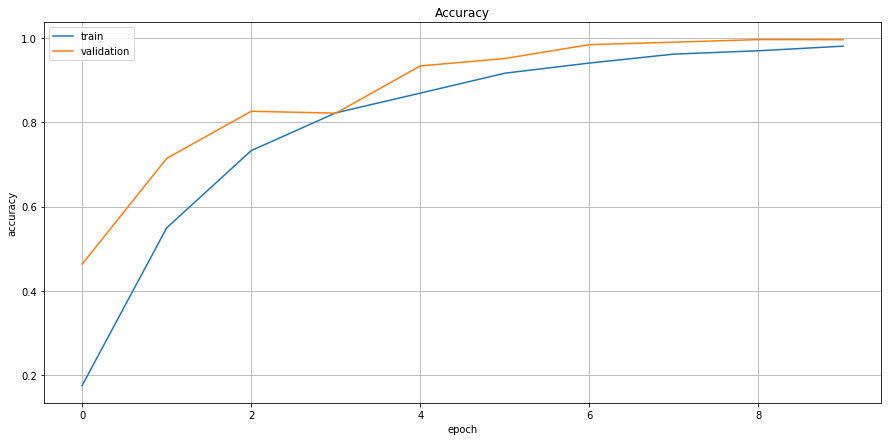

In [62]:
plt.figure(figsize = (15,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.grid()
plt.show()

As you can see, the number of epochs increase the accuracy also increases.

## Evaluate the Performance

Let's validate our model with the test data. Recall that the testing data is imported explicitly. Now it's time to make use of it.

In [73]:
# Converting test_images to shape of (28,28,1) in prior to evaluating the model
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [74]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

7172/7172 [==============================] - 2s 331us/sample - loss: 0.4497 - acc: 0.8646
Test accuracy: 0.8646124


If your model has Testing accuracy to be larger than Training accuracy. Then, your model seems to be overfit. This is the situation in which a machine learning model performs worse on newly unseen data (testing data) than on the training data.

At this point, we need to tune our model using various methods. However, if the testing accuracy is moderately good, then we have a good starting point.

## Make Predictions

Let's try making some predictions with the trained model.

In [65]:
preds = model.predict(test_images)

In [66]:
preds[0]

array([2.11161858e-13, 1.13408913e-15, 1.11619665e-04, 6.41287093e-11,
       3.86124084e-11, 4.77138581e-03, 9.89241779e-01, 1.32735819e-04,
       1.94581501e-17, 2.43505324e-12, 4.44122776e-07, 2.47155303e-14,
       2.58670462e-14, 4.82681254e-03, 1.59177649e-09, 2.06967581e-08,
       1.06374667e-13, 6.15319840e-09, 8.72451754e-04, 3.35322907e-17,
       1.65186116e-13, 3.64041102e-16, 4.27321793e-05, 5.66817745e-14],
      dtype=float32)

In [67]:
np.argmax(preds[0])

6

In [68]:
print(test_labels[0])
print(class_names[test_labels[0]])

6
G


### Plot predictions

These helper functions actually help us plot the image with the corresponding prediction.

In [69]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(24),class_names)
    plt.yticks([])
    thisplot = plt.bar(range(24), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In order to visualize the images, we need to reshape it to the size of `28x28`.

In [70]:
test_images = test_images.reshape(test_images.shape[0], 28, 28)
test_images.shape

(7172, 28, 28)

In [71]:
test_labels.shape

(7172,)

Now, let's give a try on a specific prediction on the testing set. Try modifying the number of i, make sure that the range of values is `0,7171`.

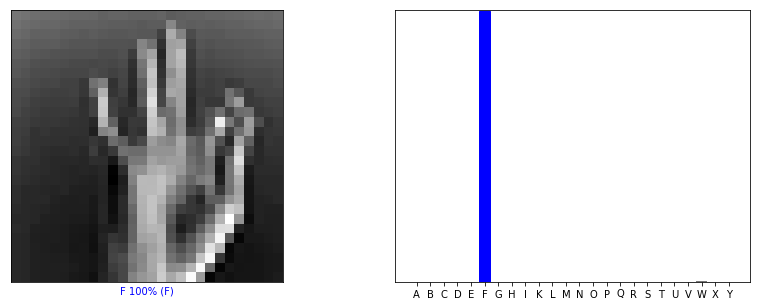

In [72]:
i = 1
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plot_image(i, preds, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds, test_labels)
plt.show()

# Congratulations !

You have just performed a very first, simple deep learning model! Let's keep your curiousity up and perform further projects as you go further !

## Further works

Try playing with different combination of hyperparameters of the network. For instance, try different activation functions and different loss functions.

## References

- [Keras-Tensorflow-Basic Classification](https://www.tensorflow.org/tutorials/keras/basic_classification)
- [Kaggle-Deep Learning for Sign Language](https://www.kaggle.com/ranjeetjain3/deep-learning-using-sign-langugage)